In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =========================
# Load Dataset
# =========================
df = pd.read_csv("co2 Emissions.csv")

# Define features (X) and target (y)
X = df.drop(columns=["CO2 Emissions(g/km)"])
y = df["CO2 Emissions(g/km)"]

# Categorical and numeric columns
categorical_cols = ["Make", "Model", "Vehicle Class", "Transmission", "Fuel Type"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# =========================
# Preprocessing
# =========================
# One-hot encode categorical features, keep numeric features as-is
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# Models
# =========================
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

# Train & evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

# =========================
# Show Results
# =========================
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    print(f"R² Score: {metrics['R2']:.4f}")
    print(f"MAE: {metrics['MAE']:.2f} g/km")
    print(f"RMSE: {metrics['RMSE']:.2f} g/km")



Linear Regression Performance:
R² Score: 0.9913
MAE: 3.24 g/km
RMSE: 5.47 g/km

Random Forest Performance:
R² Score: 0.9964
MAE: 1.83 g/km
RMSE: 3.51 g/km



Linear Regression Performance:
R² Score: 0.9913
MAE: 3.24 g/km
RMSE: 5.47 g/km

Random Forest Performance:
R² Score: 0.9964
MAE: 1.83 g/km
RMSE: 3.51 g/km

XGBoost Performance:
R² Score: 0.9957
MAE: 2.08 g/km
RMSE: 3.85 g/km


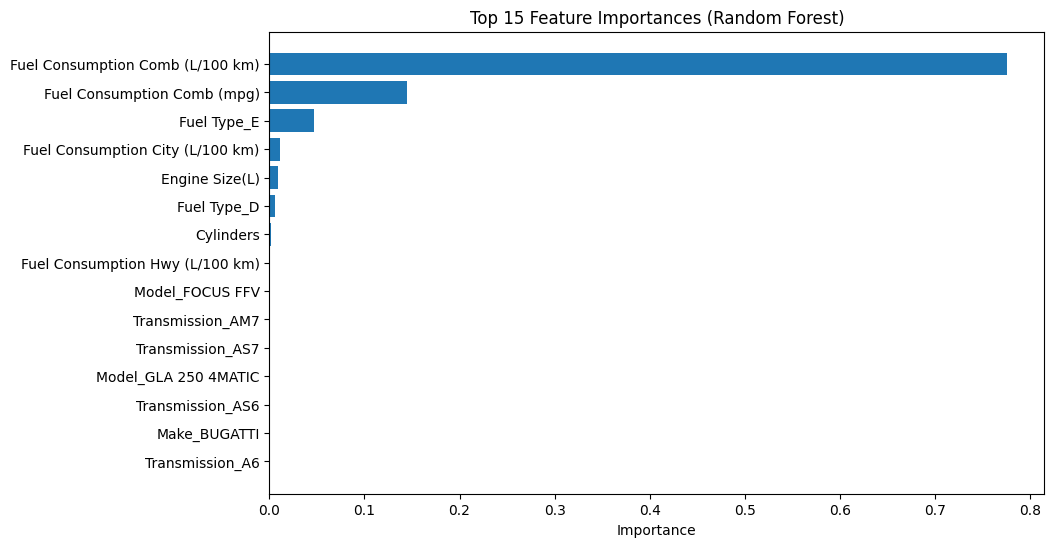

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Optional: XGBoost (install if needed: pip install xgboost)
from xgboost import XGBRegressor

# =========================
# Load Dataset
# =========================
df = pd.read_csv("co2 Emissions.csv")

# Features & Target
X = df.drop(columns=["CO2 Emissions(g/km)"])
y = df["CO2 Emissions(g/km)"]

# Categorical & Numeric Features
categorical_cols = ["Make", "Model", "Vehicle Class", "Transmission", "Fuel Type"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# =========================
# Preprocessing
# =========================
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# Models
# =========================
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
}

results = {}
trained_pipelines = {}

# Train & evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }
    
    trained_pipelines[name] = pipeline

# =========================
# Show Results
# =========================
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    print(f"R² Score: {metrics['R2']:.4f}")
    print(f"MAE: {metrics['MAE']:.2f} g/km")
    print(f"RMSE: {metrics['RMSE']:.2f} g/km")

# =========================
# Feature Importance (Random Forest)
# =========================
rf_model = trained_pipelines["Random Forest"]["model"]

# Get feature names after one-hot encoding
ohe = trained_pipelines["Random Forest"]["preprocessor"].named_transformers_["cat"]
feature_names = list(ohe.get_feature_names_out(categorical_cols)) + numeric_cols

# Feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features

plt.figure(figsize=(10,6))
plt.barh(np.array(feature_names)[indices], importances[indices])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

# =========================
# Load Dataset
# =========================
df = pd.read_csv("co2 Emissions.csv")

# Features & Target
X = df.drop(columns=["CO2 Emissions(g/km)"])
y = df["CO2 Emissions(g/km)"]

# Categorical & Numeric Features
categorical_cols = ["Make", "Model", "Vehicle Class", "Transmission", "Fuel Type"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest (best model)
model = RandomForestRegressor(n_estimators=200, random_state=42)

pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
pipeline.fit(X_train, y_train)

# Save trained pipeline
joblib.dump(pipeline, "best_co2_model.pkl")
print("Model saved as best_co2_model.pkl")


Model saved as best_co2_model.pkl
